In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import plot as pl

In [11]:
# read csv with pandas
ferplus = pd.read_csv('../data/ferplus.csv')
ferplus

,Usage,pixels,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,4,0,0,1,3,2,0,0,0,0
1,Training,151 150 147 155 148 133 111 140 170 174 182 15...,6,0,1,1,0,0,0,0,2,0
2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,5,0,0,3,1,0,0,0,1,0
3,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,4,0,0,4,1,0,0,0,1,0
4,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,9,0,0,1,0,0,0,0,0,0
5,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,6,0,0,1,0,0,1,1,1,0
6,Training,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,2,0,0,8,0,0,0,0,0,0
7,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,0,10,0,0,0,0,0,0,0,0
8,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...,0,10,0,0,0,0,0,0,0,0
9,Training,255 254 255 254 254 179 122 107 95 124 149 150...,0,0,6,0,0,0,4,0,0,0


In [12]:
# extract and cast pixel intensities
ferplus.pixels = ferplus.pixels.str.split()
ferplus.pixels = ferplus.pixels.map(lambda p: pd.to_numeric(p, downcast='float'))

In [13]:
ferplus.pixels[0].dtype

dtype('float32')

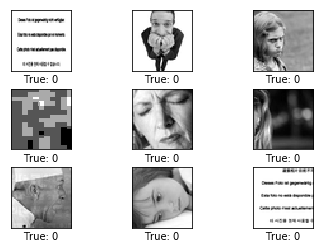

In [5]:
# filter out noface class
noface = ferplus.query('NF!=0')
ferplus = ferplus.query('NF==0')
# show a sample of noface class
nf_sample = noface.sample(n=9)['pixels'].values
pl.plot_images(nf_sample, [0,0,0,0,0,0,0,0,0], 48)

In [6]:
# get argmax of class distribution to use as label
labels = ferplus[['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']]
maxlabels = labels.idxmax(axis=1).map(labels.columns.get_loc)
ferplus.insert(loc=12, column='maxlabel', value=maxlabels)
ferplus


# the same using numpy
# labels = ferplus[['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']].values
# maxlabels = np.argmax(labels, axis=1)
# len(maxlabels)
# maxlabels

,Usage,pixels,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF,maxlabel
0,Training,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",4,0,0,1,3,2,0,0,0,0,6
1,Training,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",6,0,1,1,0,0,0,0,2,0,6
2,Training,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",5,0,0,3,1,0,0,0,1,0,6
3,Training,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",4,0,0,4,1,0,0,0,1,0,4
4,Training,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",9,0,0,1,0,0,0,0,0,0,6
5,Training,"[55, 55, 55, 55, 55, 54, 60, 68, 54, 85, 151, ...",6,0,0,1,0,0,1,1,1,0,6
6,Training,"[20, 17, 19, 21, 25, 38, 42, 42, 46, 54, 56, 6...",2,0,0,8,0,0,0,0,0,0,4
7,Training,"[77, 78, 79, 79, 78, 75, 60, 55, 47, 48, 58, 7...",0,10,0,0,0,0,0,0,0,0,3
8,Training,"[85, 84, 90, 121, 101, 102, 133, 153, 153, 169...",0,10,0,0,0,0,0,0,0,0,3
9,Training,"[255, 254, 255, 254, 254, 179, 122, 107, 95, 1...",0,0,6,0,0,0,4,0,0,0,5


In [7]:
# split train, test and validation set
train = ferplus.loc[ferplus['Usage'] == 'Training']
test = ferplus.loc[ferplus['Usage'] == 'PublicTest']
validation = ferplus.loc[ferplus['Usage'] == 'PrivateTest']

In [34]:
train['maxlabel'].values
#x=np.zeros((2000,10))
#type(x[0])

(28452,)

In [31]:
np.array(test['pixels'].values.tolist())

array([[254, 254, 254, ...,  42, 129, 180],
       [156, 184, 198, ..., 172, 167, 161],
       [ 69, 118,  61, ...,  88,  87,  90],
       ..., 
       [255, 255, 255, ...,  48,  50,  46],
       [ 33,  25,  31, ...,   4,   5,   4],
       [ 61,  63,  59, ..., 113, 165, 180]])